In [22]:
#activate the commnad bellow if you do not have tensorflow downloaded
#!pip install tensorflowt
#!pip install pydot graphviz

In [29]:
from numpy import argmax
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import Input
import numpy as np
from PIL import Image
from tensorflow.keras.utils import plot_model

In [30]:
#loading the mnist dataset
(x_train, y_train), (x_test, y_test) = load_data()
#reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [31]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

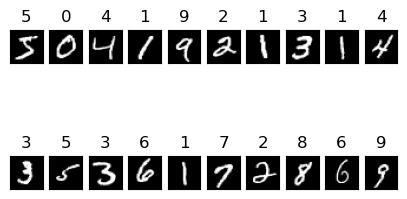

In [32]:
#display 15 images in grayscale 
fig = plt.figure(figsize = (5,3))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks = [] , yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap = 'gray')
    ax.set_title(y_train[i])

In [33]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [34]:
inp_shape = (28, 28, 1)
#defining the model wich is a secuential model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
model.save("modelo.h5")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
x = model.fit(x_train, y_train, epochs = 10 , batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.9198 - loss: 0.2580 - val_accuracy: 0.9818 - val_loss: 0.0650
Epoch 2/10
422/422 - 4s - 9ms/step - accuracy: 0.9744 - loss: 0.0827 - val_accuracy: 0.9845 - val_loss: 0.0515
Epoch 3/10
422/422 - 4s - 9ms/step - accuracy: 0.9813 - loss: 0.0596 - val_accuracy: 0.9897 - val_loss: 0.0332
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.9907 - val_loss: 0.0309
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9913 - val_loss: 0.0338
Epoch 6/10
422/422 - 4s - 9ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9913 - val_loss: 0.0329
Epoch 7/10
422/422 - 4s - 9ms/step - accuracy: 0.9890 - loss: 0.0324 - val_accuracy: 0.9927 - val_loss: 0.0307
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.9927 - val_loss: 0.0243
Epoch 9/10
422/422 - 4s - 9ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9935 - val_loss: 0.0262


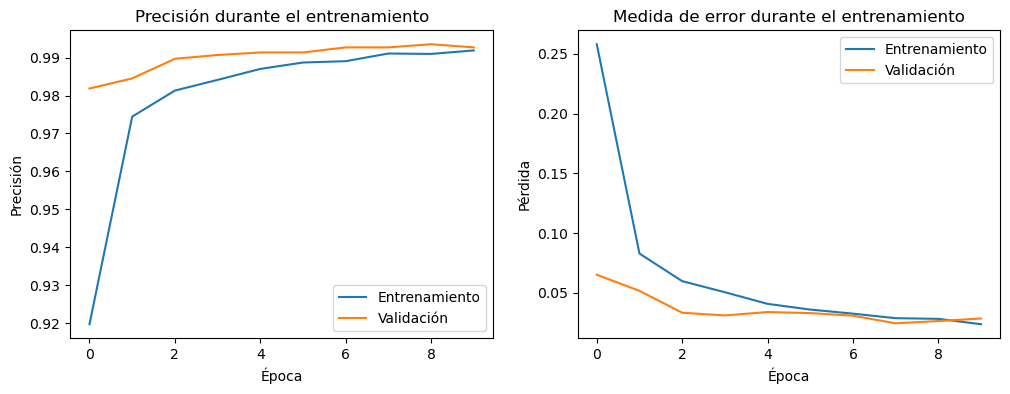

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x.history['accuracy'], label='Entrenamiento')
plt.plot(x.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x.history['loss'], label='Entrenamiento')
plt.plot(x.history['val_loss'], label='Validación')
plt.title('Medida de error durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [38]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuracy: {accuracy * 100}')

Accuracy: 99.40000176429749


In [39]:
valor = int(input('Digite un valor de 0 a 9999 para escoger una imagen de la base de datos de MNIST: '))

if valor < 0 or valor > 9999:
    raise ValueError("El valor debe estar entre 0 y 9999.")

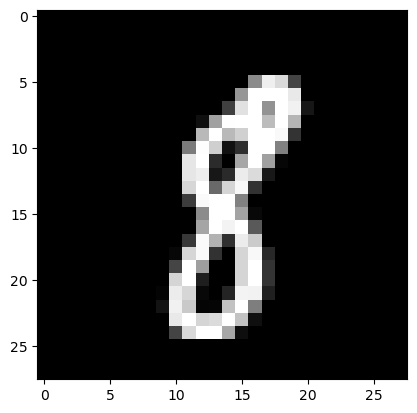

In [40]:
image = x_train[valor]

plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [41]:
image = image.reshape(1, 28, 28, 1)
p = model.predict(image)
print('Predicción ejemplo:', argmax(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicción ejemplo: 8
